In [1]:
import dendropy
import glob
from dendropy.calculate import treecompare
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reference_tree = dendropy.Tree.get_from_path("barden.tre", schema = "nexus", preserve_underscores=True)

In [3]:
list_trees = glob.glob("Tri.sum.trees/mcc/*.tree")

In [4]:
list_untrees = glob.glob("Tri.sum.untrees/mcc/*.tree")

In [54]:
list_trees

['Tri.sum.trees/mcc\\1.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\10.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\100.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\11.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\12.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\13.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\14.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\15.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\16.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\17.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\18.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\19.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\2.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\20.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\21.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\22.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\23.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\24.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\25.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\26.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\27.nex.trees.mcc.tree',
 'Tri.sum.trees/mcc\\28.nex.trees.mcc.tree',
 'Tri.sum.t

In [55]:
list_untrees

['Tri.sum.untrees/mcc\\1.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\10.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\100.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\11.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\12.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\13.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\14.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\15.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\16.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\17.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\18.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\19.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\2.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\20.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\21.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\22.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\23.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\24.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\25.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\26.nex.trees.mcc.tree',
 'Tri.sum.untrees/mcc\\27.nex.trees.mcc.tree',
 'Tri.sum.untr

In [22]:
rf_unlist = []
for tree in list_untrees:
    est_tree = dendropy.Tree.get_from_path(tree, schema = "nexus", preserve_underscores = True, taxon_namespace = reference_tree.taxon_namespace)
#    unrf = treecompare.robinson_foulds_distance(reference_tree, est_tree)
    unrf = treecompare.symmetric_difference(reference_tree, est_tree)

    rf_unlist.append(unrf)
    print(unrf)

54
56
56
56
56
56
54
54
52
56
56
54
56
54
56
56
56
56
54
56
56
54
54
52
56
56
52
54
54
54
56
56
56
56
54
56
56
54
56
54
56
56
56
56
54
54
56
54
56
54
54
54
52
56
56
52
56
56
56
56
56
56
54
54
54
56
56
54
54
56
56
54
54
54
54
52
56
56
56
56
56
56
54
54
54
52
56
54
56
56
56
54
54
54
56
56
54
54
56
56


In [23]:
rf_list = []
for tree in list_trees:
    est_tree = dendropy.Tree.get_from_path(tree, schema = "nexus", preserve_underscores = True, taxon_namespace = reference_tree.taxon_namespace)
#    rf = treecompare.robinson_foulds_distance(reference_tree, est_tree)
    rf = treecompare.symmetric_difference(reference_tree, est_tree)

    rf_list.append(rf)
    print(rf)

50
52
50
54
56
52
50
54
56
54
50
54
52
52
56
52
50
54
54
52
52
56
54
56
56
52
54
48
52
52
54
54
54
52
54
54
54
52
52
56
54
54
56
52
52
52
54
52
52
56
54
54
56
54
56
50
56
54
52
56
54
50
54
56
52
56
52
54
50
54
54
54
56
52
52
56
56
54
54
50
50
54
56
52
54
54
52
54
54
50
56
56
52
54
54
54
50
56
54
54


In [24]:
df = pd.DataFrame({'RF': rf_list, 'unRF': rf_unlist})
df["Magnitude"] = df["unRF"] - df["RF"]

In [9]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019DABD40DD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019DABBB2F98>]], dtype=object)

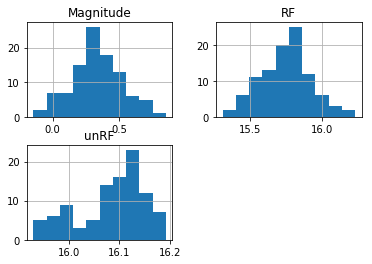

In [10]:
sns.distplot(df["Magnitude"], kde = True, color = "blue")
plt.xlabel("Change in Distance to True Tree")
plt.ylabel("Frequency")
plt.savefig("Figure 1.pdf")
plt.show()

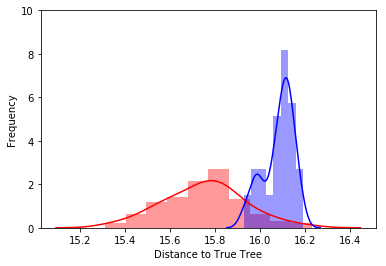

In [18]:
sns.distplot(df["RF"], kde = True, label = "Partitioned", color = "red")
sns.distplot(df["unRF"], kde = True, label = "Unpartitioned", color = "blue")
plt.xlabel("Distance to True Tree")
plt.ylabel("Frequency")
plt.ylim(0,10)
plt.savefig("Figure 2.pdf")
plt.show()

In [90]:
len(rf_list)

100

In [25]:
df.to_csv("symmetric_difference.csv")